## Model Evaluation

- So far, learned about two classifiers:

    - SVM
    
    - Logistic Regression
    
- How we can evalute which model performs better for our classification task?

## Activity:  Write a function that returns 

TN, FP, FN, TP, Accuracy, Precision, Recall, F1-score

* TN = True Negative(Actual:0, Predicted:0)

* FP = False Positive(Actual:0, Predicted:1)

* FN False Negative(Actual:1, Predicted:0)

* TP = True Positive(Actual:1, Predicted:1)

From Confusion Matrix

- Hint:

* Accuracy = ((TP + TN) / float(TP + TN + FP + FN))
overall, how often is the classifier correct?

* Precision = TP / float(TP + FP)
when a positive value is predicted, how often is the prediction correct?

* Recall = TP / float(FN + TP)
when the actual value is positive, how often is the prediction correct?

* Specificity = TN / (TN + FP)
when the actual value is negative, how often is the prediction correct?

* Classification Error = 1 - accuracy = FP + FN / (TP + TN+ FP + FN)
overall, how often is this classifier incorrect


* F1-score = 2 x (Precision x Recall )/(Precision + Recall)
harmonic mean of precision and recall


In [8]:
from sklearn import metrics
import numpy as np

# confusion = metrics.confusion_matrix(y_test, y_pred)
# print(confusion)

confusion = np.array([[118., 12.], [ 47., 15.]])
TN = confusion[0,0]     # confusion[actual, predicted]
FP = confusion[0,1]
TP = confusion[1,1]
FN = confusion[1,0]

accuracy = ((TP + TN) / float(TP + TN + FP + FN))
precision = TP / float(TP + FP)
recall = TP / float(FN + TP)
# specificity = TN / (TN + FP)
F1_score = 2*precision*recall/float(precision+recall)

print(accuracy, precision, recall, F1_score)

0.6927083333333334 0.5555555555555556 0.24193548387096775 0.3370786516853933


## Activity: How can we obtain y_pred (whose elements are 0 and 1) from:
- `y-pred_prob` = logreg.predict_proba(X_test)
- Goal: `y_pred_proba` --> `y_pred`
- Steps: For given `y_pred_proba`, check if the first element is > 0.5 then returns 0 else returns 1

In [39]:
def y_pred_elements(y_pred_prob):
    y_pred = []
    for i in y_pred_prob:
        if i[1] < 0.3576388888888889:
            y_pred.append(0)
        else:
            y_pred.append(1)
            
    return y_pred

In [41]:
new_y_pred = y_pred_elements(y_pred_prob)

In [43]:
y_train.value_counts()[1]/len(y_train)

0.3576388888888889

In [48]:
metrics.confusion_matrix(y_test, new_y_pred)

array([[87, 43],
       [24, 38]])

## Activity: Change the threshold of Logistic Regression to get new (better) confusion matrix

- The question now is which threshold is better?

- To do this:

1- Train `logreg = LogisticRegression()` and get `y_pred_prob = logreg.predict_proba(X_test)`

2- The second column of `y_pred_prob` is the probability that a subject be diabetes 

3- Plot histogram of second column. Hint: `plt.hist(y_pred_prob[:, 1], bins=8) plt.show()`

4- Count how many of `y_train` is 0 how many is 1. Define thershold as `threshold = y_train.value_counts()[1] / len(y_train)`

5- Write a function that returns 0 if `y_pred_prob[:, 1]` is less than threshold, else returns 1

6- Calculate the Confuction Matrix by `confusion = metrics.confusion_matrix(y_test, y_pred)`

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('diabetes.csv')
print(pima.columns)
print(pima.head())

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

X = pima[feature_cols]
# print(X)
# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
y_pred_prob

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438],
       [0.64244443, 0.35755557],
       [0.25912035, 0.74087965],
       [0.63949765, 0.36050235],
       [0.76987637, 0.23012363],
       [0.57345769, 0.42654231],
       [0.80896485, 0.19103515],
       [0.54236399, 0.45763601],
       [0.8809859 , 0.1190141 ],
       [0.56071047, 0.43928953],
       [0.63038849, 0.36961151],
       [0.55812011, 0.44187989],
       [0.62388338, 0.37611662],
       [0.80183978, 0.19816022],
       [0.58322696, 0.41677304],
       [0.84451719, 0.15548281],
       [0.7468329 , 0.2531671 ],
       [0.90256923, 0.09743077],
       [0.30366288, 0.69633712],
       [0.84641691, 0.15358309],
       [0.7802164 , 0.2197836 ],
       [0.

In [26]:
# With threshold 0.5
print((Accuray, Precision, Recall, F1_score))

#(0.6927083333333334, 0.5555555555555556, 0.24193548387096775, 0.3370786516853933)

# With Optimal Theshold
print((Accuray, Precision, Recall, F1_score))

#(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)

(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)
(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)


## Activity: Change the threshold of Logistic Regression (y_pred_proba) to get new confusion matrix and better model performance

- The question hnow is which threshold is better?
- To do this:
1- Train logreg = LogisticRegression() and get y_pred_prob = logreg.predict_proba(X_test)
2- The second column of y_pred_prob is the probability that a subject has diabetes
3- Plot histogram of second column. Hint: plt.hist(y_pred_prob[:,1], bins=8) plt.show()
4- Count how many of y_train is 0 and how is 1. Define threshold as:
    - ratio of positive class (diabetes) versus negative (OK) class
    - threshold = y_train.value_counts()[1] / len(y_train)

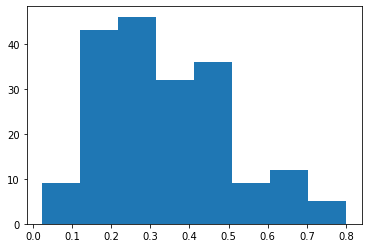

In [36]:
import matplotlib.pyplot as plt

plt.hist(y_pred_prob[:, 1], bins = 8)
plt.show()

In [ ]:
import seaborn as sns

sns.distplot(y_pred_prob)

In [27]:
from sklearn.preprocessing import binarize

y_pred_prob_class_1 = logreg.predict_proba(X_test)[:,1]
y_pred_class_threshold = binarize(y_pred_prob_class_1.reshape(1,-1), 0.3576388888888889)[0]
print(y_pred_class_threshold)

[1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [28]:
print(y_test.values.T)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [37]:
import numpy as np

confusion = np.array([[80, 50], [16, 46]])

# confusion = np.array([[87, 43], [24, 38]])

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

Accuray = ((TP + TN) / float(TP + TN + FP + FN))

Precision = TP / float(TP + FP)

Recall = TP / float(FN + TP)

F1_score = 2*Precision*Recall/float(Precision+Recall)

print((Accuray, Precision, Recall, F1_score))

(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)


## Cross-Validation

- Normally in a machine learning process, data is divided into training and test sets; the training set is then used to train the model and the test set is used to evaluate the performance of a model 

- It is possible that the accuracy obtained on one test is very different to accuracy obtained on another test set using the same algorithm

- To see the model performance, we use K-Fold Cross-Validation for performance evaluation where K is any number

- Suppose we want to perform 5-fold cross validation

## Lets obtain Accuracy and F1-Score for 5-fold cross validation based on diabetes dataset

In [53]:
from sklearn.model_selection import cross_val_score 
import pandas as pd
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix,access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

print(y.value_counts()[0])
print(y.value_counts()[1])

logreg = LogisticRegression(class_weight={1: 500/268})     # 500/258 is the total number of 0's over 1's in y_value
#logreg = LogisticRegression(class_weight={1: y.value_counts()[0]/y.value_counts()[1]})
# logreg = LogisticRegression()

# cv = cross-validation
all_accuracies = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='accuracy')
print(all_accuracies)      # [0.64935065 0.65584416 0.64935065 0.69281046 0.65359477]
print(all_accuracies.mean())      # 0.6601901366607248

all_f1 = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='f1')
print(all_f1)       # [0.578125   0.55462185 0.54237288 0.624      0.576     ]
print(all_f1.mean())      # 0.5750239460190857

500
268
[0.64935065 0.65584416 0.64935065 0.69281046 0.65359477]
0.6601901366607248
[0.578125   0.55462185 0.54237288 0.624      0.576     ]
0.5750239460190857


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

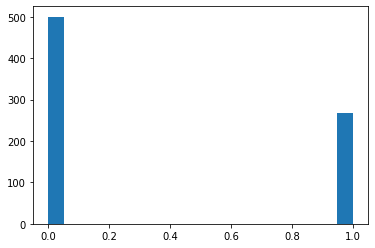

0    500
1    268
Name: Outcome, dtype: int64

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(y, bins=20)
plt.show()

y_pd_series = pd.Series(y)
y_pd_series.value_counts()

# How to choose Models based on Cross-Validation
* we want to have low vairance for CV --> pick a model with the lower variance
* if both have low variance --> pick the model with the higher mean

# Grid Search for Parameter Selection
* Machine learning models have hyper-parameters. To know which values of hyper-paramaeters give the best result we need grid search

* Question: what does grid search mean?

In [54]:
## Grid Search for Parameter Selection

from sklearn import svm, grid_search

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

ImportError: cannot import name 'grid_search' from 'sklearn' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/__init__.py)